In [8]:
info = {
 "title": "Candy Cane",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1080, 1080)
}

In [1]:
import numpy as np
from math import pi

from stylo.color import FillColor
from stylo.domain.transform import translate, rotate
from stylo.shape import Circle, Rectangle, Shape
from stylo.image import LayeredImage

In [17]:
black = FillColor()
red = FillColor("ff0000")
white = FillColor("ffffff")
darkgreen = FillColor("004400") 

In [89]:
class Leaf(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale

    def draw(self):
        
        y1 = 1.3
        y2 = 1.2
        y3 = 1
        
        x1 = 1
        x2 = 1.8
        
        c1 = Circle(y=y1, r=0.6, fill=True)
        c2 = Circle(y=-y1, r=0.6, fill=True)
        
        c3 = Circle(x=x1, y=-y2, r=0.6, fill=True)
        c4 = Circle(x=-x1, y=-y2, r=0.6, fill=True)
        c5 = Circle(x=x1, y=y2, r=0.6, fill=True)
        c6 = Circle(x=-x1, y=y2, r=0.6, fill=True)
        
        c7 = Circle(x=x2, y=-y3, r=0.6, fill=True)
        c8 = Circle(x=-x2, y=-y3, r=0.6, fill=True)
        c9 = Circle(x=x2, y=y3, r=0.6, fill=True)
        c10 = Circle(x=-x2, y=y3, r=0.6, fill=True)
        
        def leaf(x, y):
            
            x = x/self.scale
            y = y/self.scale
            
            xs = x / 2.5
            
            above = y > xs*xs - 1
            below = y < 1 - xs*xs
            
            leaf = np.logical_and(above, below)
            
            c = np.logical_or(c1(x=x, y=y), c2(x=x, y=y))
            c = np.logical_or(c3(x=x, y=y), c)
            c = np.logical_or(c4(x=x, y=y), c)
            c = np.logical_or(c5(x=x, y=y), c)
            c = np.logical_or(c6(x=x, y=y), c)
            c = np.logical_or(c7(x=x, y=y), c)
            c = np.logical_or(c8(x=x, y=y), c)
            c = np.logical_or(c9(x=x, y=y), c)
            c = np.logical_or(c10(x=x, y=y), c)
            
            cutouts = np.logical_not(c)
            
            #return cutouts
            return np.logical_and(leaf, cutouts)
        
        return leaf

In [90]:
class Cane(Shape):
    
    def draw(self):
            
        y1 = 0.3
        
        stem = Rectangle(x=0, y=-0.1, width=0.08, height=0.8)
        outer_hook = Circle(x=0.16, y=y1, r=0.2, fill=True)
        inner_hook = Circle(x=0.16, y=y1, r=0.12, fill=True)
        
        cap1 = Circle(x=0.32, y=y1, r=0.04, fill=True)
        cap2 = Circle(y=-0.5, r=0.04, fill=True)
        
        def cane(x, y):
            
            inner = np.logical_not(inner_hook(x=x, y=y))
            ring = np.logical_and(outer_hook(x=x, y=y), inner)
            
            hook = np.logical_and(ring, y >= y1)
            
            candy = np.logical_or(stem(x=x, y=y), hook)
            candy = np.logical_or(candy, cap1(x=x, y=y))
            
            return np.logical_or(candy, cap2(x=x, y=y))
            
        return cane
    
class CandyCane(Shape):
    
    def __init__(self, invert=False, flip=False):
        self.invert = invert
        self.flip = flip
    
    def draw(self):
        
        cane = Cane()
        
        def candy(x, y):
            
            if self.flip:
                x = -x
            
            # Rotate the domain by hand.
            rx = np.cos(-pi/4)*x - np.sin(-pi/4)*y
            ry = np.sin(-pi/4)*x + np.cos(-pi/4)*y
            
            stripes = rx/4 < -np.sin(28*ry*pi)
            
            if self.invert:
                stripes = np.logical_not(stripes)
            
            candycane = np.logical_and(cane(x=x, y=y), stripes)
            
            return candycane
            
        return candy

In [91]:
cane = CandyCane() >> rotate(pi/6)
inv_cane = CandyCane(True) >> rotate(pi/6)

cane2 = CandyCane(flip=True) >> rotate(-pi/6)
inv_cane2 = CandyCane(invert=True, flip=True) >> rotate(-pi/6)

leaf1 = Leaf(scale=0.06) >> rotate(pi/12) >> translate(-0.1, 0)
leaf2 = Leaf(scale=0.06) >> rotate(-pi/12) >> translate(0.1, 0)

cherry1 = Circle(y=-0.05, r=0.02, fill=True)
cherry2 = Circle(x=0.02, y=-0.02, r=0.02, fill=True)
cherry3 = Circle(x=-0.02, y=-0.02, r=0.02, fill=True)

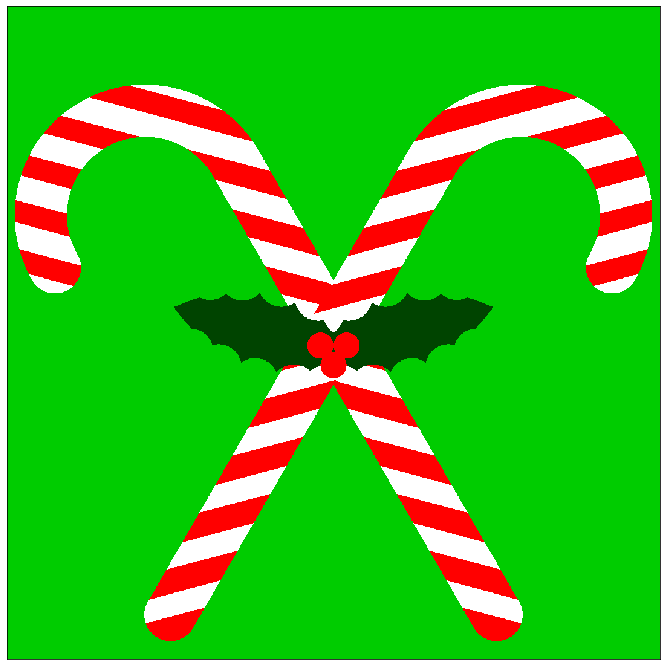

In [92]:
image = LayeredImage(background="00cc00", scale=1)

image.add_layer(cane2, red)
image.add_layer(inv_cane2, white)

image.add_layer(cane, red)
image.add_layer(inv_cane, white)

image.add_layer(leaf1, darkgreen)
image.add_layer(leaf2, darkgreen)

image.add_layer(cherry1, red)
image.add_layer(cherry2, red)
image.add_layer(cherry3, red)

image(1080, 1080)